In [1]:
import pickle, tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import numpy as np

In [2]:
pickle_in = open("H:/Mi unidad/Programacion/Deep Learning/Tema 1/X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("H:/Mi unidad/Programacion/Deep Learning/Tema 1/y.pickle","rb")
y = pickle.load(pickle_in)


In [3]:
type(y)

list

In [4]:
X = X/255.0

In [5]:
type(X)

numpy.ndarray

In [6]:
y = np.array(y)


In [7]:
model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=3, validation_split=0.3)

C:\Users\Usuario\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
546/546 ━━━━━━━━━━━━━━━━━━━━ 895s 2s/step - accuracy: 0.5454 - loss: 0.8712 - val_accuracy: 0.6217 - val_loss: 0.6554
Epoch 2/3
546/546 ━━━━━━━━━━━━━━━━━━━━ 886s 2s/step - accuracy: 0.6342 - loss: 0.6460 - val_accuracy: 0.6128 - val_loss: 0.6583
Epoch 3/3
546/546 ━━━━━━━━━━━━━━━━━━━━ 868s 2s/step - accuracy: 0.6550 - loss: 0.6237 - val_accuracy: 0.6614 - val_loss: 0.6126


1. Función de Activación ReLU
python
Copiar código
model.add(Activation('relu'))
Función ReLU (Rectified Linear Unit): La función ReLU se define como: 
𝑓(𝑥)=max⁡(0,𝑥)
f(x)=max(0,x)

Ejemplo Matemático:

Supongamos que la salida de la capa convolucional antes de aplicar ReLU es un vector: 
Salida=[2,−1,0,3]
Salida=[2,−1,0,3]

Aplicando ReLU a este vector: 
ReLU([2,−1,0,3])=[2,0,0,3]
ReLU([2,−1,0,3])=[2,0,0,3]

¿Por qué usar ReLU?

No linealidad: Introduce no linealidad en el modelo, permitiendo aprender funciones más complejas.
Simplicidad: Evita problemas como la desaparición del gradiente, ya que los valores negativos se convierten en cero, y los positivos se mantienen.
2. Elección de Parámetros en Conv2D
python
Copiar código
model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
Número de Filtros (256):

256 filtros permiten detectar una amplia gama de características diferentes en la imagen. Cada filtro captura un aspecto diferente de la imagen, como bordes, texturas o patrones.
Tamaño del Kernel (3, 3):

(3, 3) es un tamaño común para los kernels (filtros) porque es un buen equilibrio entre capturar detalles finos y reducir la complejidad computacional. Un filtro de 3x3 puede detectar patrones locales con una buena resolución.

3. Número de Neuronas en Dense
python
Copiar código
model.add(Dense(64))
Número de Neuronas (64):

64 neuronas en la capa densa permiten que el modelo aprenda una representación más abstracta y compleja de las características extraídas por las capas convolucionales. Esta capa es donde se combinan y procesan las características detectadas en las capas anteriores.
Ejemplo Matemático para Dense:

Supongamos que la entrada a la capa densa es un vector de 1024 elementos. La salida para cada neurona en esta capa se calcula como: 
salida𝑖=ReLU(∑𝑗=11024(𝑤𝑖𝑗×𝑥𝑗)+𝑏𝑖)
salida i​ =ReLU(∑ j=11024​ (w ij​ ×x j​ )+b i​ )

donde 𝑤𝑖𝑗w ij​  es el peso asociado a la conexión entre la entrada 𝑥𝑗x j​  y la neurona 𝑖i, y 𝑏𝑖b i​  es el sesgo de la neurona 𝑖i. La ReLU se aplica después de la combinación lineal.

4. Número de Neuronas en la Capa de Salida Dense
python
Copiar código
model.add(Dense(1))
Número de Neuronas (1):

1 neurona en la capa de salida es suficiente para una clasificación binaria, donde la salida se interpreta como la probabilidad de pertenecer a una clase positiva. La neurona aplica una función de activación sigmoide para producir una salida entre 0 y 1.
Ejemplo Matemático para la Capa de Salida:

Supongamos que la salida de la capa densa antes de aplicar la función sigmoide es 
𝑧=2.5
z=2.5: 
sigmoide(𝑧)=11+𝑒−𝑧≈11+𝑒−2.5≈0.924
sigmoide(z)= 1+e −z 1​ ≈ 1+e −2.5 1​ ≈0.924

Esto indica que la probabilidad de que la imagen pertenezca a la clase positiva es aproximadamente 0.924.

5. Repetición de Capas Conv2D, ReLU y MaxPooling2D
python
Copiar código
model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
¿Por qué repetir?

Primera Capa Conv2D y MaxPooling2D: Extrae características locales y realiza pooling para reducir la dimensionalidad. Permite al modelo captar patrones básicos y reducir la resolución espacial de la imagen, manteniendo las características más relevantes.

Segunda Capa Conv2D y MaxPooling2D: Profundiza el proceso de extracción de características. La segunda capa convolucional puede capturar combinaciones más complejas de las características detectadas por la primera capa. La repetición de convolución y pooling ayuda a construir representaciones jerárquicas y abstractas de la imagen, esencial para tareas complejas como la clasificación de imágenes.

Ejemplo:

Primera Capa:

Detecta bordes y texturas.
Pooling reduce la resolución, manteniendo las características importantes.
Segunda Capa:

Combina bordes y texturas detectadas en patrones más complejos (como formas o partes de objetos).
Pooling adicional sigue reduciendo la resolución, pero con una comprensión más abstracta.
Repetir estos pasos permite que el modelo construya representaciones más detalladas y complejas de las imágenes, lo que ayuda a mejorar el rendimiento en la tarea de clasificación.

Claro, veamos en detalle por qué la función ReLU (Rectified Linear Unit) es tan popular en redes neuronales, especialmente en redes neuronales convolucionales (CNNs):

1. No Linealidad
Las redes neuronales necesitan ser capaces de aprender relaciones complejas y no lineales entre las entradas y las salidas. Sin funciones de activación no lineales, la red sería equivalente a una única capa lineal, sin importar cuántas capas se apilen. Esto limitaría enormemente la capacidad del modelo para aprender patrones complejos.

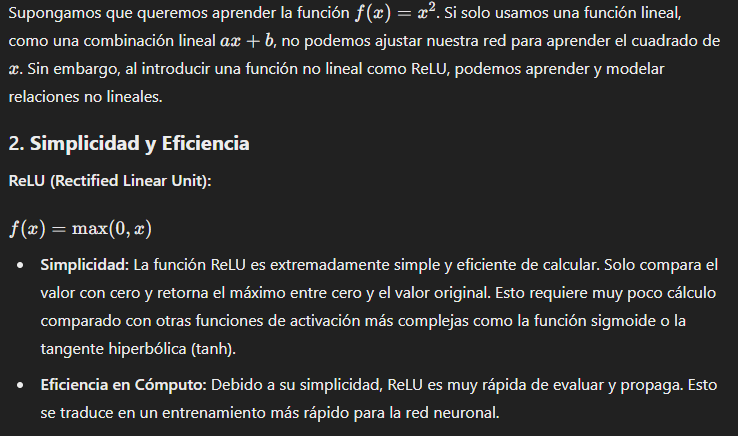
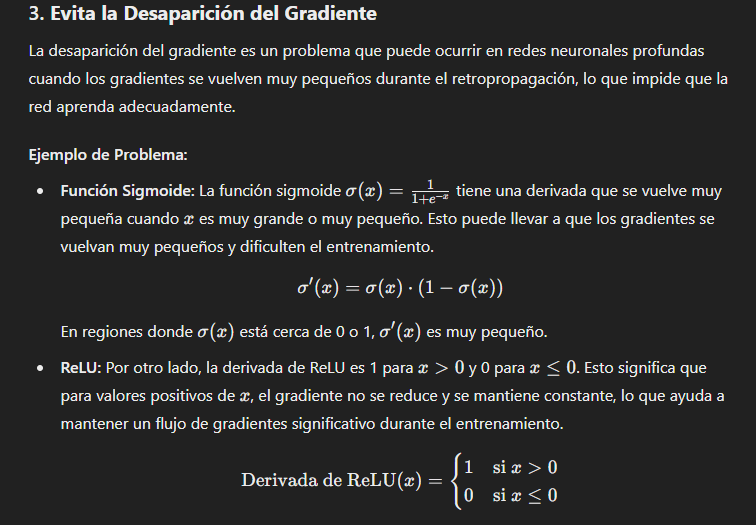
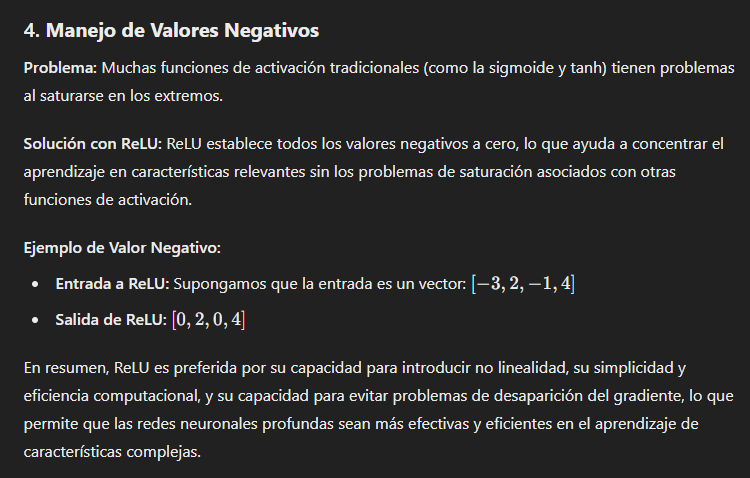